# Experiment 2
## Visualizing $a,v$ time series and manifold representation

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import os
from sys import platform
from matplotlib import rc
from matplotlib.animation import FuncAnimation
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import itertools

# from jupyterthemes import jtplot
# jtplot.style(context='talk', fscale=2, spines=False, gridlines='--', )


# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
# rc('figure', figsize=(10,5))

import matplotlib.pyplot as plt


%matplotlib inline

In [33]:
home = os.path.expanduser('~')

In [34]:
home

'/Users/i_67981492'

In [35]:
data_dir = os.path.join(home, 'Documents/elife_revisions_loki/manifold_estimation_redeux/'); print(data_dir)

ts_fig_path = os.path.join(data_dir, 'evoked_av_time_series/'); print(ts_fig_path)
manifold_fig_path = os.path.join(data_dir, 'manifold_plots/'); print(manifold_fig_path)

/Users/i_67981492/Documents/elife_revisions_loki/manifold_estimation_redeux/
/Users/i_67981492/Documents/elife_revisions_loki/manifold_estimation_redeux/evoked_av_time_series/
/Users/i_67981492/Documents/elife_revisions_loki/manifold_estimation_redeux/manifold_plots/


In [36]:
av_polar_est_df = pd.read_csv(os.path.join(data_dir, 'loki0.5_av_polar_est_df.csv'))

In [37]:
av_polar_est_df.head()

,mcmc_iteration,shifted_epoch_trial,v,v_est_z,a,a_est_z,r_z,theta_radians_z,theta_deg_z
0,0,-1.0,0.357331,0.767298,0.983536,0.438212,NaN,NaN,NaN
1,0,0.0,-0.475507,-1.907671,0.971127,-0.300620,2.775128,-1.840280,-105.440254
2,0,1.0,-0.072172,-0.612213,0.976214,0.002291,1.330402,1.341098,76.839243
3,0,2.0,0.347012,0.734153,0.947642,-1.698929,2.169528,2.472111,141.641503
4,0,3.0,0.371451,0.812649,0.991511,0.913071,2.613179,0.030043,1.721330


In [38]:
av_polar_est_df.loc[av_polar_est_df.shifted_epoch_trial == -1].r_z.unique()

array([nan])

In [39]:
mean_av_df = av_polar_est_df.groupby(['shifted_epoch_trial'])[['a_est_z', 'v_est_z']].mean().reset_index() # only plot t-1-3

mean_av_df.head()

,shifted_epoch_trial,a_est_z,v_est_z
0,-1.0,-0.018632,0.648173
1,0.0,0.061755,-1.603853
2,1.0,0.234660,-0.638723
3,2.0,-0.802722,0.649204
4,3.0,0.524939,0.945198


In [40]:
def plot_a_v_time(data, fig, ax, fig_path=write_dir, linestyle='-', 
                  legend=True, home=os.path.expanduser('~')):


    # hack to get hue to work with lineplots and markers ...

    n_plotted_trials = data.shifted_epoch_trial.nunique()

    palette_seed = sns.color_palette('Greens', n_colors=200)[80::10]

    assert len(palette_seed) >= n_plotted_trials, 'check n_colors for color palette'

    palette = itertools.cycle(palette_seed)

    sns.lineplot(data=data, x='a_est_z', y='v_est_z', hue='shifted_epoch_trial', palette=palette_seed[:n_plotted_trials], marker='o');

    x = data.a_est_z
    y = data.v_est_z

    for i in range(len(data)):
        plt.plot(x.values[i:i+2], y.values[i:i+2], color=next(palette), linestyle=linestyle, linewidth=2.5)

    plt.xlabel(r'Boundary height ($\hat{a}$)')
    plt.ylabel(r'Drift rate ($\hat{v}$)')

    if legend:
        legend = ax.legend()
        legend.texts[0].set_text("epoch trial")
    else:
        ax.get_legend().remove()

    return fig, ax

In [41]:
mean_av_df = av_polar_est_df.groupby(['shifted_epoch_trial'])[['a_est_z', 'v_est_z']].mean().reset_index() # only plot t-1-3

mean_av_df.head()

,shifted_epoch_trial,a_est_z,v_est_z
0,-1.0,-0.018632,0.648173
1,0.0,0.061755,-1.603853
2,1.0,0.234660,-0.638723
3,2.0,-0.802722,0.649204
4,3.0,0.524939,0.945198


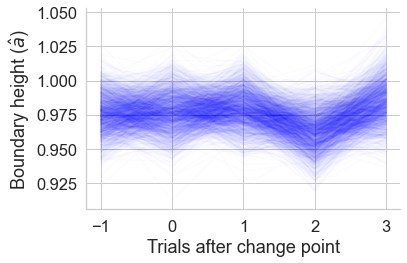

In [46]:
sns.set(style='whitegrid', font_scale=1.5) 

plt.figure()

for it in av_polar_est_df.mcmc_iteration.unique():
    
    dat = av_polar_est_df.loc[av_polar_est_df.mcmc_iteration == it].copy().reset_index(drop=True)
    
    g = sns.lineplot(x="shifted_epoch_trial", y="a", data=dat, color='blue', alpha=0.01)
    
sns.despine()
plt.ylabel(r'Boundary height ($\hat{a}$)'); plt.xlabel('Trials after change point')
plt.tight_layout()

plt.savefig(os.path.join(home, ts_fig_path, 'E2_evoked_a_mcmc.pdf'), dpi=1200, bbox_inches='tight', pad_inches=0)

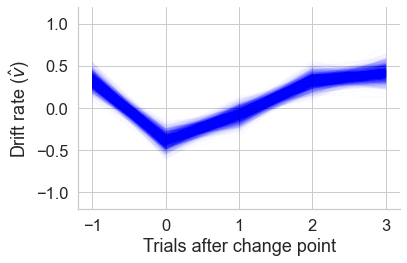

In [45]:
sns.set(style='whitegrid', font_scale=1.5) 

plt.figure()

for it in av_polar_est_df.mcmc_iteration.unique():
    
    dat = av_polar_est_df.loc[av_polar_est_df.mcmc_iteration == it].copy().reset_index(drop=True)
    
    g = sns.lineplot(x="shifted_epoch_trial", y="v", data=dat, color='blue', alpha=0.01)
    
sns.despine()
plt.ylabel(r'Drift rate ($\hat{v}$)'); plt.xlabel('Trials after change point')
plt.ylim([-1.2,1.2])
plt.tight_layout()

plt.savefig(os.path.join(home, ts_fig_path, 'E2_evoked_v_mcmc.pdf'), dpi=1200, bbox_inches='tight', pad_inches=0)

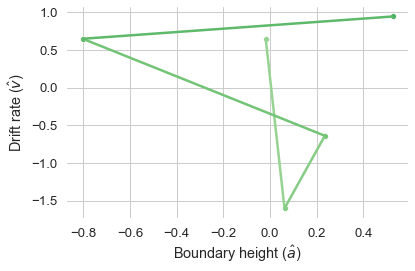

In [42]:
sns.set(style='whitegrid', font_scale=1.2) 

fig, ax = plt.subplots()

plot_a_v_time(mean_av_df, fig, ax, legend=False)

sns.despine(left=True, bottom=True)
plt.tight_layout()
 
plt.savefig(os.path.join(home, manifold_fig_path, 'E2_evoked_manifold.pdf'), dpi=1200, bbox_inches='tight', pad_inches=0)